In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
cd ..

/Users/luke/Code/ml-projects/ml-from-scratch


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from algorithms.logistic_regression.core import Model
from algorithms.logistic_regression.optimization import Hyperparameters, GradientDescent

In [5]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [6]:
df = pd.read_csv("data/iris.csv.xls")

In [7]:
binary_df = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

In [8]:
binary_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [9]:
petal_lengths = binary_df[['petal_length', 'species']]

In [10]:
def map_color(species):
    if species == "Iris-setosa":
        return 'red'
    elif species == 'Iris-versicolor':
        return 'blue'
    else:
        return 'black'

colors = list(map(map_color, petal_lengths['species']))

In [11]:
petal_lengths.shape

(100, 2)

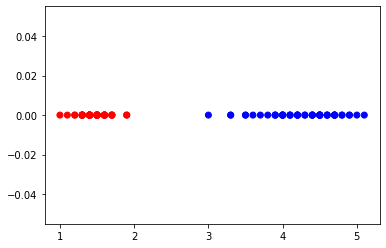

In [12]:
plt.scatter(x=petal_lengths['petal_length'], y=np.zeros(petal_lengths.shape[0]), c=colors)

In [13]:
def map_species(species):
    if species == "Iris-setosa":
        return 0
    elif species == "Iris-versicolor":
        return 1

In [14]:
data = pd.DataFrame()
data["petal_length"] = petal_lengths["petal_length"]

In [15]:
data.head()

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [16]:
data["label"] = (petal_lengths["species"] == "Iris-versicolor").astype(int)

In [17]:
weights = np.array([0.001, 0.001])
initial_model = Model(weights, threshold=0.5)
hyperparameters = Hyperparameters(learning_rate=0.01, tolerance=0.005, epochs=200000, initial_model=initial_model)
optimizer = GradientDescent(hyperparameters)

In [18]:
labeled_data = data.to_numpy()

In [19]:
solution = optimizer.solve(labeled_data)

INFO:root:Training epoch 0...
INFO:root:Loss in current epoch is 0.6924503046077624
INFO:root:Training epoch 20000...
INFO:root:Loss in current epoch is 0.03456569818027894
INFO:root:Training epoch 40000...
INFO:root:Loss in current epoch is 0.018888455150921933
INFO:root:Training epoch 60000...
INFO:root:Loss in current epoch is 0.013322109895338718
INFO:root:Training epoch 80000...
INFO:root:Loss in current epoch is 0.010413241356879203
INFO:root:Training epoch 100000...
INFO:root:Loss in current epoch is 0.008606262525771709
INFO:root:Training epoch 120000...
INFO:root:Loss in current epoch is 0.007366561664709706
INFO:root:Training epoch 140000...
INFO:root:Loss in current epoch is 0.006459167671660129
INFO:root:Training epoch 160000...
INFO:root:Loss in current epoch is 0.005764007087423616
INFO:root:Training epoch 180000...
INFO:root:Loss in current epoch is 0.005213074425215216


In [20]:
solution

Solution(model=Model(weights=array([-12.78904633,   5.01733193]), threshold=0.5), loss=0.004999982257341741)

In [21]:
model = solution.model

In [22]:
xrange = np.arange(0, 6, 0.1).reshape(-1, 1)
probabilities = model.probability(xrange)

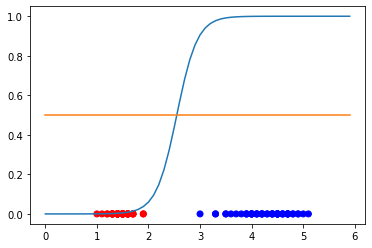

In [23]:
plt.plot(xrange, probabilities)
plt.scatter(x=petal_lengths['petal_length'], y=np.zeros(petal_lengths.shape[0]), c=colors)
plt.plot(xrange, np.ones(xrange.shape[0]) * model.threshold)